# Introduction

Making money from sports betting using 'math' is - by no means - a 'new' concept for those familiar with basic probability theory, but it is nevertheless a valuable skill to learn. Doing so can teach someone how betting odds are skewed in favour of the bookmaker, and can teach those eager to make money, or casual 'punters', how to be 'sharp' with their betting.

There are two main ways to utilise mathematics to make money in the sports betting markets: pure arbitrage, and statistical arbitrage. The former banks on the inefficiencies of opposing bookmakers, while the latter involves exploiting the abundance of betting promotions available to Australian consumers.

I aim to explain, not only the mathematics behind both of these approaches, crossovers with the 'trading' industry, but also a basic Python project on how I scraped some popular bookmaker websites for 'live' odds prices to create a betting system to profit.

## Expected Value

Expected value, or EV for short, is a concept from probability theory relating probabilities and payoffs. A general formula, in the context of a bet with two outcomes, looks like the following:
$EV = \text{probability of winning} \times \text{gain from win} + \text{probability of losing} \times \text{initial bet} \times -1$.

So, what is the EV for betting on a sports game in the eyes of a punter? Well, let's have a look at an example from an AFL game (taken from July 2023):

Essendon vs Western Bulldogs, with the odds for Essendon at $\$2.20$ to win, and the Bulldogs at $\$1.65$.
But what are the probabilities of winning or losing? We will start by taking the inverse of the odds, that is, Essendon have a $\frac{1}{2.20}$ chance of winning, while the Bulldogs have a $\frac{1}{1.65}$ chance of winning. 
If we bet $\$50$ on Essendon to win, our expected payoff is: $\frac{1}{2.20}\times (2.20-1)\times 50+\frac{1}{1.65}\times -50\approx -\$3.03$, which is about -6% edge. 

There is one caveat with this, however, and that is using the bookmaker odds as the 'fair' or 'true' probabilities. Much like the market-making world, no one knows the true 'theoretical' value of a security, but that does not mean you cannot make a market around it if there are active market participants willing to buy or sell the security at said prices. 

We can briefly discuss the concept of bookmaker margins, by summing the inverse of the odds on an event, just like the previous example, this will be: $\frac{1}{2.20}+\frac{1}{1.65}\approx 106\%$, meaning the bookmaker in this example had around a 6% margin on the event, that is, they are set to make 6% in profits of all wagered bets regardless of the outcome (excluding the edge case where little to no wagers are made on one outcome of the event). This is much like market makers collecting edge from the spreads (difference between bid and ask prices) in their books. 

One immediate implication following this is that an event, like a coin toss, with 50/50 probabilities of heads and tails would be offered with odds like 1.90, so that the bookmaker always wins. This is why many line bets (in sports betting) with '50/50' probabilities are offered these odds. The fair odds, of course, would be 2.00 each way, but then the bookmaker does not win. 

# Pure Arbitrage

Pure arbitrage, or pure arb for short, is a concept in finance generally related to the buying and selling of securities by capitalising on pricing inefficiencies between brokers to generate a small guaranteed profit. In the betting world, the same applies by finding two bookmakers with different pricing that allows for a margin below 100% if betting on opposing outcomes. Let's look at an example, following the same AFL game with a second bookmaker:

|          | Bookmaker 1 | Bookmaker 2 |
|----------|-------------|-------------|
| Essendon | 2.20        | 2.60        |
| Bulldogs | 1.65        | 1.50        |
| Margin   | 106%        | 105%        |

If we back Essendon @ 2.20 with Bookmaker 1 and Bulldogs @ 1.50 with Bookmaker 2, we can guarantee a very small profit, leading me to my first simple project: how much do we stake each way?

If this were a program, we can prompt the user for the odds, however, for demonstrative purposes I will assign direct values:

In [1]:
book1_eventA = 2.2
book1_eventB = 1.65
book2_eventA = 2.6
book2_eventB = 1.5

In [2]:
eventA = {
    'Bookmaker 1' : book1_eventA,
    'Bookmaker 2' : book2_eventA
}

eventB = {
    'Bookmaker 1' : book1_eventB,
    'Bookmaker 2' : book2_eventB
}

Now, let's determine if there exists an arbitrage opportunity:

In [3]:
odds_A = max(eventA.values())
odds_B = max(eventB.values())

margin = 1/odds_A + 1/odds_B
if (margin < 1):
    print(f"There is an arbitrage opportunity with {100*(1-margin):.2f}% profit.")
else:
    print("There is no arbitrage opporunity with these events.")

There is an arbitrage opportunity with 0.93% profit.


Let's now determine the stakes, for this we need the payoffs for each outcome to be equal, and we need the total amount the bettor is willing to bet. We will use 100 dollars for this example:

In [46]:
total_stake = 100

We now need to determine, essentially, a balance equation, where we need the stake amount on each event to total to 100, with the returns being equal, regardless of the outcome of the event. That is: $\text{return from event A} - \text{stake on event B} = \text{return from event B} - \text{stake on event A}$, and, $\text{stake on event A} + \text{stake on event B} = 100$. 

Sparing the boring algebraic manipulation, we can come up with a stake for event A, by the formula:
$$\text{stake for event A} = \dfrac{\text{event B odds} \cdot \text{total stake}}{\text{event A odds} + \text{event B odds}}$$

In [47]:
eventA_stake = (odds_B * total_stake) / (odds_A + odds_B)
eventB_stake = total_stake - eventA_stake
eventA_return = eventA_stake * (odds_A - 1) - eventB_stake
eventB_return = eventB_stake * (odds_B - 1) - eventA_stake

Finally, we can now print out our betting 'strategy' for the user:

In [56]:
print(f"Place a bet of ${eventA_stake:.2f} on Event A \
at {max(eventA, key = eventA.get)} @ ${odds_A:.2f} odds, \
\nand place a bet of ${eventB_stake:.2f} on Event B \
at {max(eventB, key = eventB.get)} @ ${odds_B:.2f} odds.")

print(f"Your returns if Event A wins are: ${eventA_return:.2f}.")
print(f"Your returns if Event B wins are: ${eventB_return:.2f}.")

Place a bet of $38.82 on Event A at Bookmaker 2 @ $2.60 odds, 
and place a bet of $61.18 on Event B at Bookmaker 1 @ $1.65 odds.
Your returns if Event A wins are: $0.94.
Your returns if Event B wins are: $0.94.


## Limitations

The problem with this strategy is that these opportunities rarely exist in the markets, as bookmakers are very quick to change their odds. Another limitation is the assumption that the market will be liquid enough to take your bet, especially larger bets, can very easily make the odds change and leave you exposed to potentially one side of the event, which is not what you want as an arb bettor. Another issue is the fact that bookmakers will be quick to limit your betting capabilities by exploiting these inefficiencies when they catch on to your irregular betting behaviour, such as betting decimal amounts on potentially obscure markets. 

Some extensions one could explore are: 
1) a bot/script to scan all possible markets in real time with a live data feed, 
2) a large betting bankroll to make these bets even worthwhile since the profit % is very small, 
3) a way to see how liquid or illiquid these markets are to see if you can even get your bet on. 

All of these issues make this an unsustainable strategy.

# Statistical Arbitrage

I will preface this section by explicitly stating that nothing here is my own unique and original workings, but rather an application of the theory. I will also say that the Python file I wrote was written in my first year of University (no data structures or algorithms course), so it is most definitely **not** efficient.

This strategy is one that many Australians have been using for many years now, especially in the domain of horse racing and sport same-game multis. So I will begin to explain the theory behind it to supplement a script I have uploaded onto my personal Github page (https://github.com/wrigzzy). 

Any Australian knows that promotions are abundant from bookmakers, such as Sportsbet and TAB, blasted all over the advertisement breaks during sporting games etc., but there are ways that punters can capitalise on these promotions by using statistical arbitrage arising from the issuing of "bonus bets". 

There are essentially 3 components to the system:

1) Conversion of bonus bets
2) Same game multis
3) Horse racing

## Conversion of bonus bets

### Betfair introduction
I will start with this section first, because it is important prerequisite knowledge for the latter components of the system. Following what we know about "fair odds" from the previous section on EV, to simplify things and reduce complexity, I use Betfair (a well-known betting exchange with close to 100% margin on their markets) to be the fair odds for my racing and sports betting model. There are some issues with using this blindly, of course, such as the manipulation of the pricing from syndicates etc., however the effects I've noticed seem to minimal on the success of the system overall.

Betfair generally displays two key prices, a back price and a lay price. The back price is your standard betting mechanism, where you back $\$100$ on an event with odds of $\$3.00$ and you will profit $\$300-100=\$200$. The lay price is the opposite however, where you essentially offer up liability to bet that something **does not** happen, or win, so a lay price of $\$3.00$ with a stake of $\$100$ means you are offering $\$300-100=\$200$ in liability to win potentially $\$100$ if it does not occur.

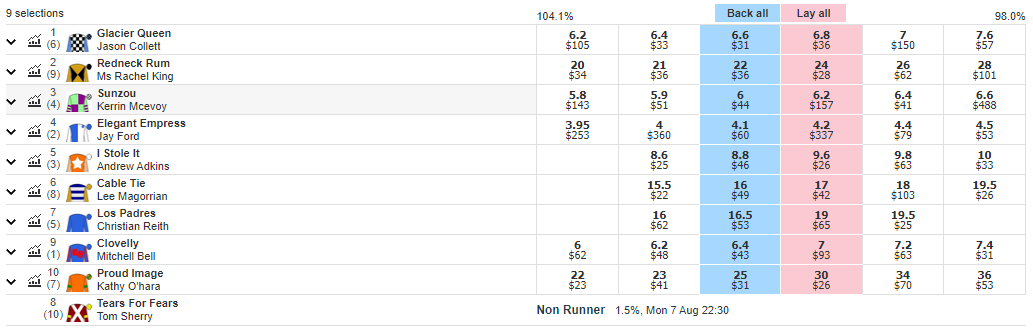

In the system, we take the lay odds to be the "fair price" or "fair odds" in the event, that is, it's inverse gives a more accurate probability estimate, opposed to the bookmakers. 

### Bonus bets

Bonus bets, sometimes referred to as "bet credits" or "bonus cash", are bets which are known to be "stake not returned" meaning a bet of $\$50$ on a $\$5.00$ odds event would return you $\$200$, rather than a normal $\$250$ were you betting with cash. 

It would be very easy to see that placing these on low odds events will not yield very significant returns, or more specifically, not efficient returns. We can refer to this as the conversion of our bonus bet, being the % of the bonus bet amount that we are able to convert into real money (in the long term). For example, if we had a 50% bonus bet conversion, we would, on average, convert $\$500$ of bonus bet money into $\$250$ real money. 

Here is a quick visualisation of the relationship between the back and lay odds in terms of bonus bet conversion (produced in MATLAB, by me):
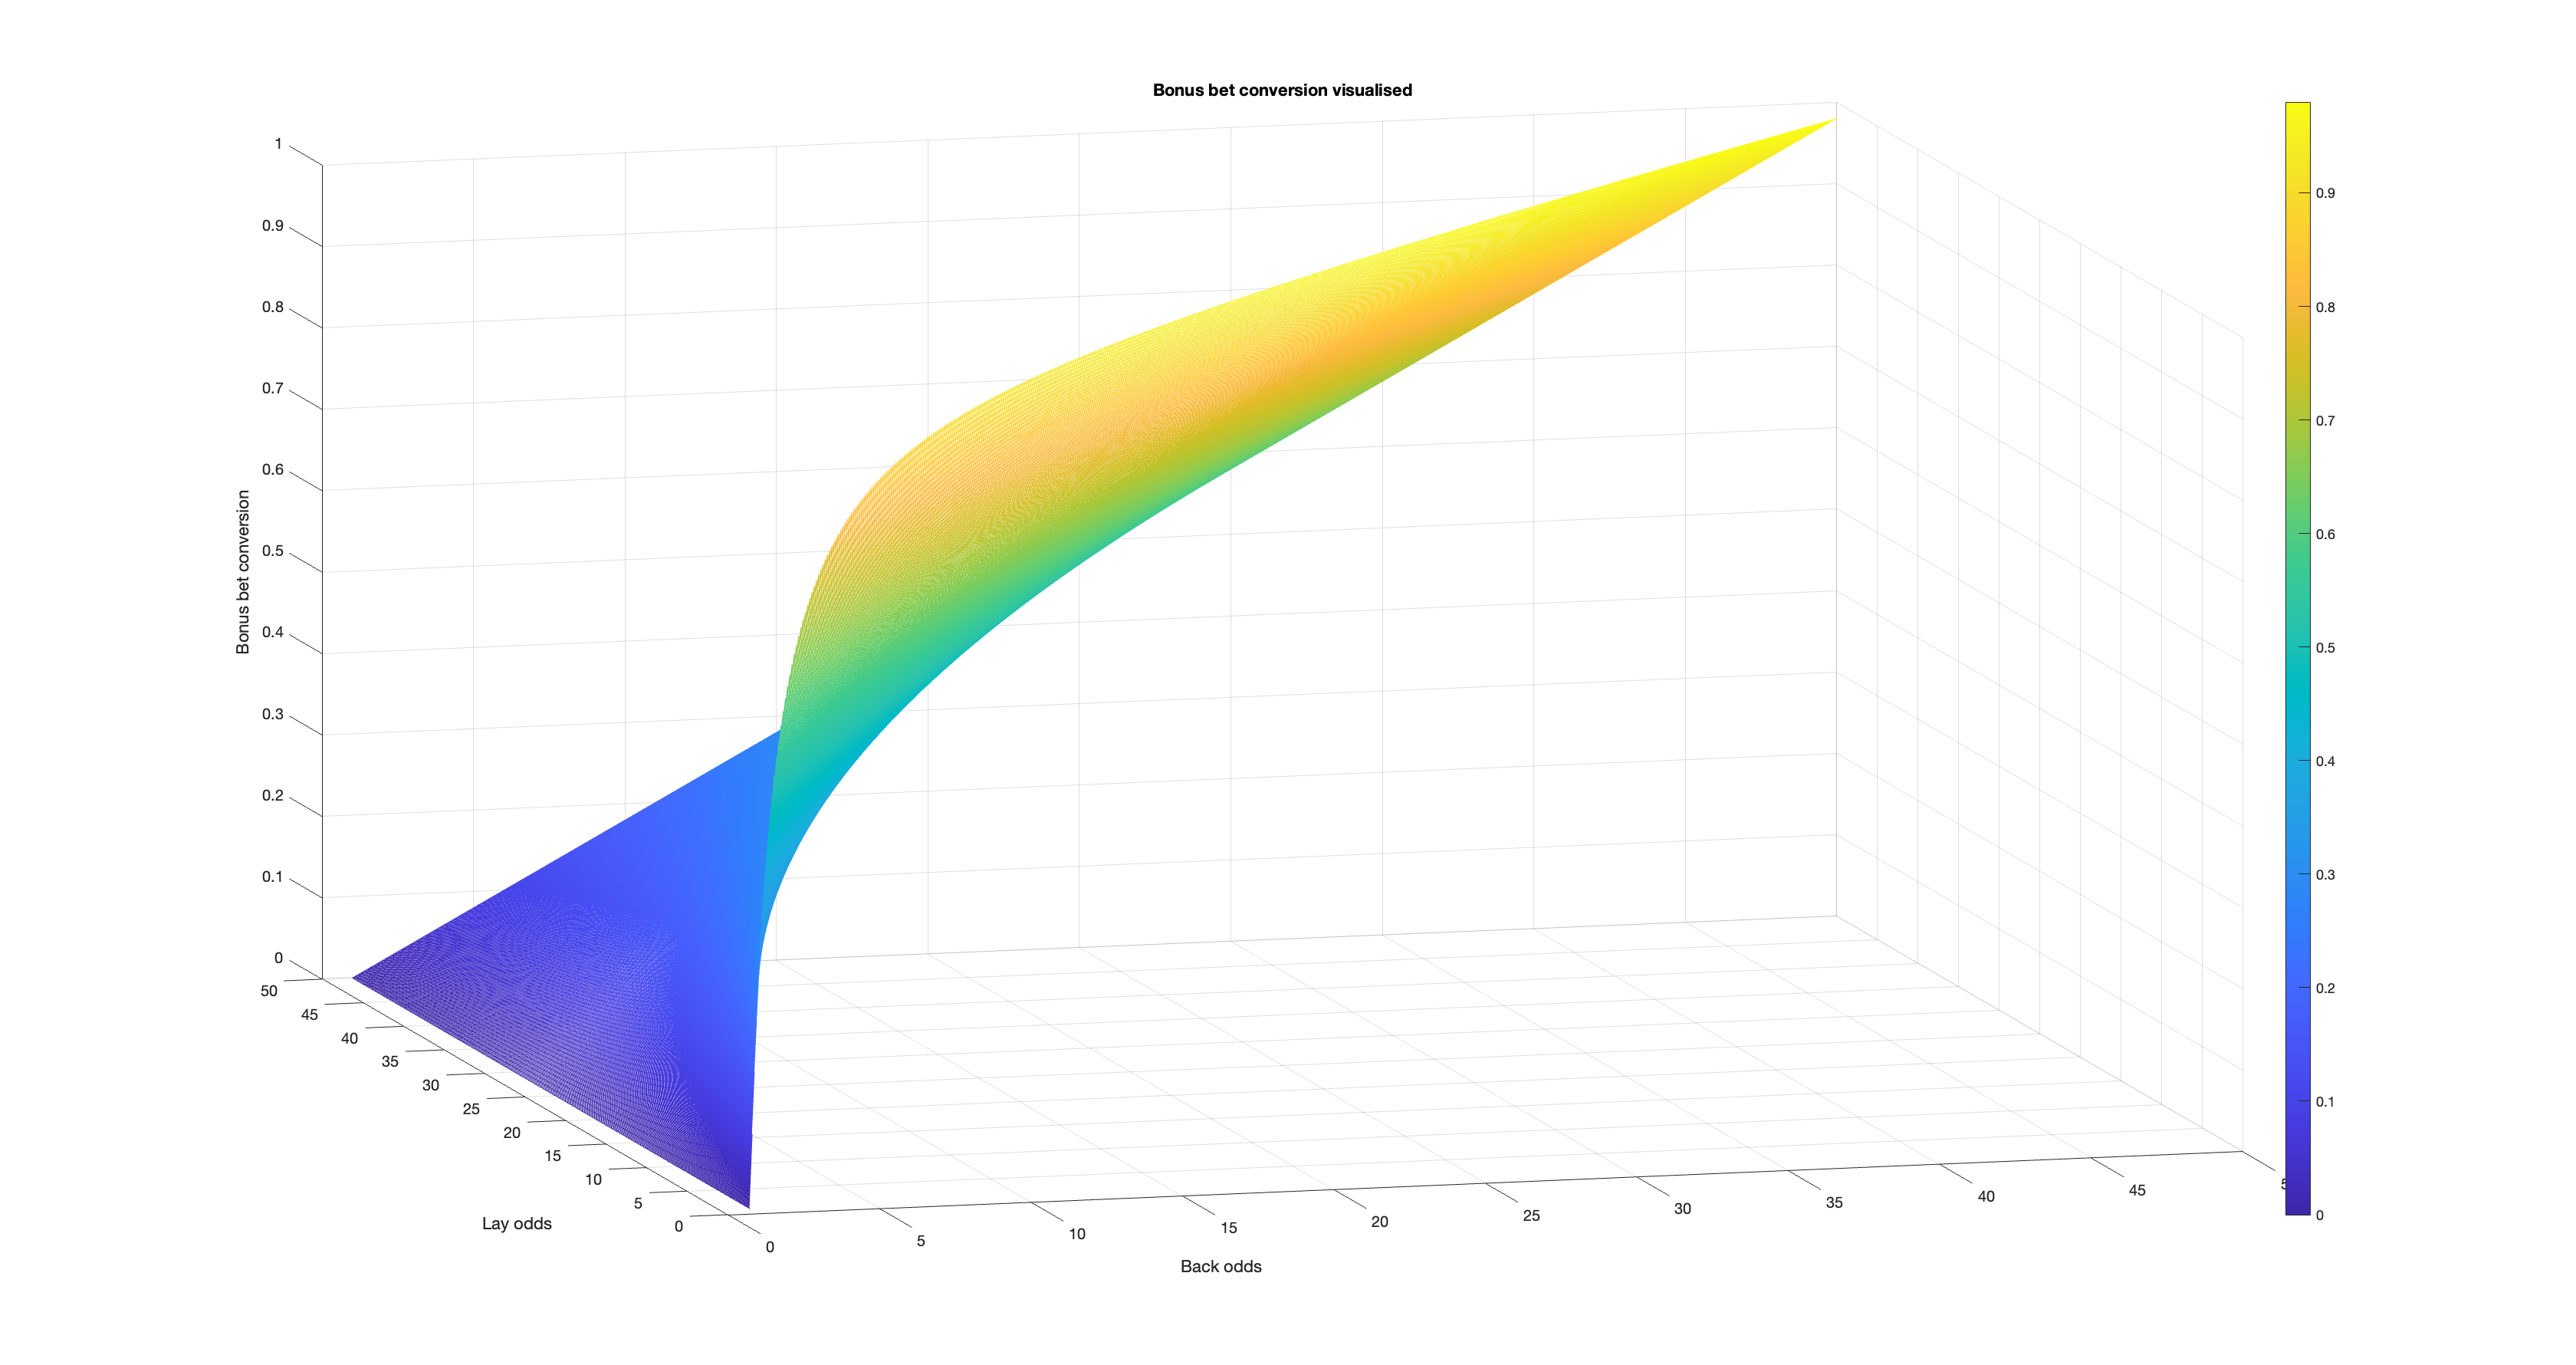

We can see the highest conversion occurs when the back and lay prices are as close together as possible (where back odds are strictly less than the lay odds), approaching 1 as they both increase. Here, the back odds would refer to the back odds of our bonus bet stake on a bookmaker, and the lay odds from Betfair. 

When it comes to actually applying this knowledge, we need to find markets that have good back-lay spread (good meaning low as possible), and markets that are **not** too improbable (low chance of hitting) as to not increase our variance more than needed. I emphasise this because this is a statistical arbitrage approach, meaning there is edge on a per bet basis, but nothing is guaranteed - this is the pure arb approach. For this reason, we want events that are generally within the $\$6.50-20$ odds range, maybe higher at times. We could use a pure arb approach by actually laying the events on Betfair, but they charge a hefty commission on winnings, so I prefer to use the "no-lay" approach for higher net returns at the cost of increased variance. 

For the conversion there a few markets I like because of the number of opportunities and success:
1) Horse racing win market (6.50-15 odds range)
2) Soccer correct score market (6.50-20 odds range)
3) Golf outright winner market (6.50-75 odds range)

I bet on these markets to "convert" my bonus bets back into real cash, so I am able to either withdraw, or use it as bankroll for future bets. I generally only place bonus bets on markets with bonus bet conversion of around 80% or higher to maximise efficiency and usage of bonus bets before they expire. This could mean an event with a back price of $\$9.00$ and a lay price on Betfair of $\$10.00$ which will come out to 80% conversion, given by the formula: $\dfrac{\text{back odds} -1}{\text{lay odds}}$. The point of this is that we want to maximise our return on our bonus bet, by betting on events where bookmaker prices tend to agree with the fair odds on Betfair (our betting exchange).

This is generally what betting is about; placing bets on events where you believe the payout is good enough, or exceeds the probabilistic risk you have derived from your own means. 

### Risk management

An important side note is the topic of risk management, or variance reduction. A good approach would be applying the Kelly Criterion for bets, however, bonus bets are usually limited to $\$50$ maximums from bets (will discuss in later sections) and are able to be split in ticks of $\$12.50$. For this reason, I had a general rule of thumb that any bonus bet I am placing over odds of $\$15$ I will stake $\$25$, over odds of $\$25$ I will stake $\$12.50$, everything else will be $\$50$, just so there is some reduction in exposure proportional to the probability of the event winning.

## Horse racing model

Now that we understand bonus bets and what their conversion means, and how we might convert them efficiently, we can talk about the main crux of the system, which is the horse racing model. Bookmakers pretty much all offer promotions that look like this on Wednesday and Saturday, generally in QLD, VIC and NSW:
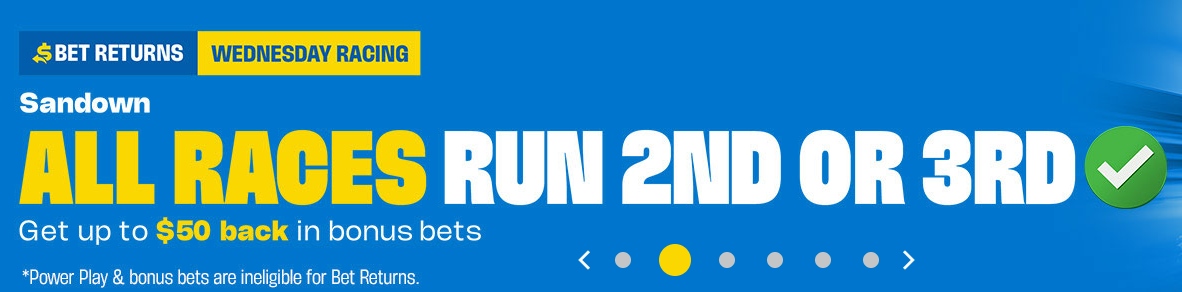

So, if we back horses with cash that have a decent chance of winning, then if they just miss out on first place, but come second or third place, then we can utilise this bonus bet to our advantage, in ways mentioned above. The bonus bet is what provides the edge in this system, since without it, we would just lose in the long term because of concepts we have already discussed. The bonus bet promotion is what helps offset losses for 2nd and 3rd place to actually create long term profitability.

This is what my Python file aims to do:

1) Parse the individual race data from TAB, Sportsbet, and Betfair (from the user's web browser tabs, or by manually entering links as inputs)
2) Clean and organise the data by bookmaker, and find the best price
3) Return a visual table of data including headings such as: number, name, back price, lay price, bookmaker, EV, bonus bet conversion
4) Continuously update every couple of seconds with a countdown until race

Since there was no public API for these bookmakers, I had discovered a way to scrape the data from the requests page for the particular websites in the program, or by simply web scraping the data if it was not dynamically loaded.

Here is an example of the output:
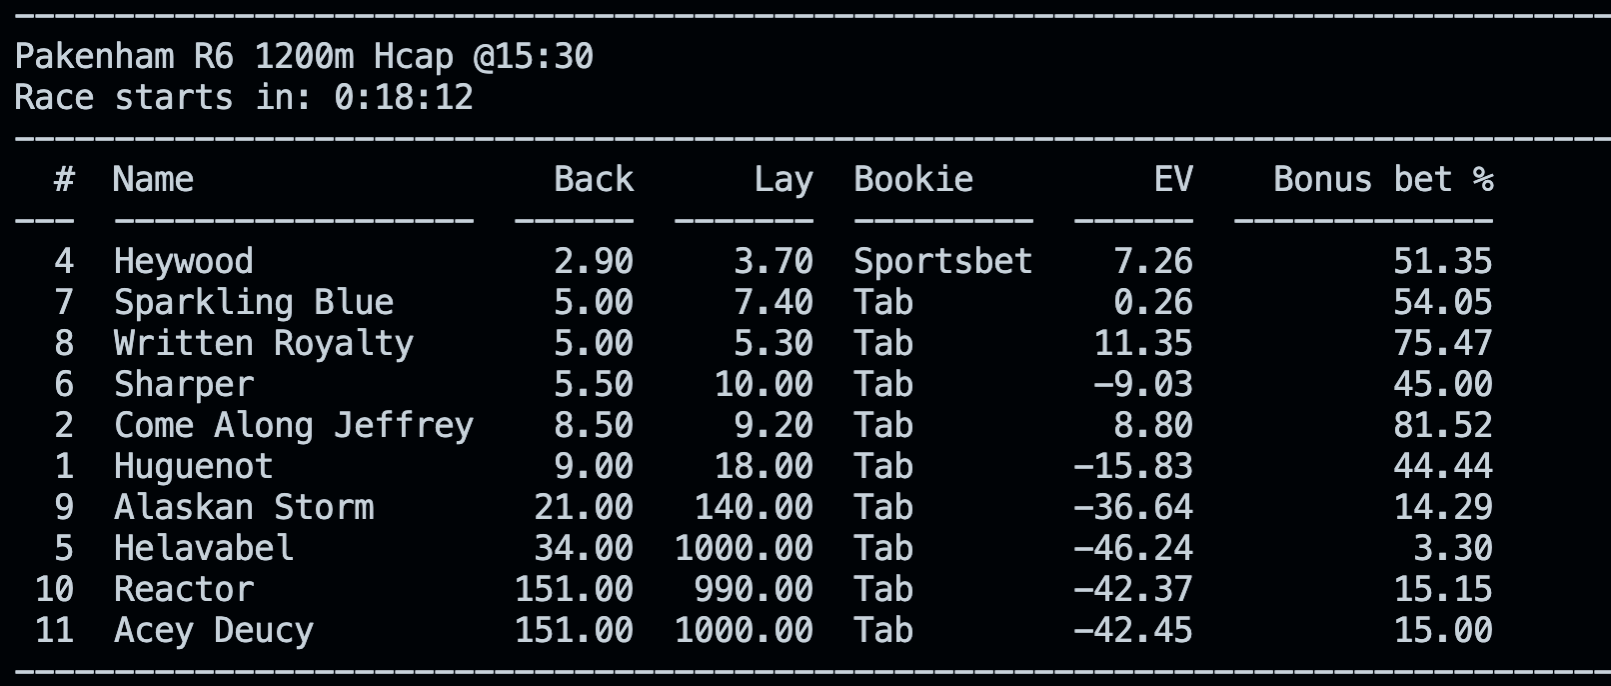

The EV formula used was the following:
$$EV = S\left((B-1)(\frac{1}{L})+(1-\frac{1}{L})(-1)+C(\frac{1}{P}-\frac{1}{L})\right),$$
where:
- S = stake size
- B = back price (bookmaker specific)
- L = Betfair lay price
- P = Betfair place price
- C = bonus bet conversion rate (long term average)

This formula essentially computes the EV for winning the race plus the potential bonus bet to cash conversion that can occur if the horse comes 2nd or 3rd (hence the place price here). 

It is important to note that I would usually wait until the last minute or two to place my bets as more betting volume coming into the markets will tighten the spreads and become a more accurate estimate of the true probabilities.

I essentially used this program on races that had promotions from multiple bookmakers to generate a steady profit in the long term. With these promotions, however, the stake sizes were generally limited to $\$50$ stakes meaning the bonus backs were also only $\$50$, but over the course of one Saturday you could end up with over 10 bonus bets (while also using some, and from the previous week).

In the long term, these racing bets would yield around 20-25% profit on turnover, and were a very good way to capitilise on some solid mathematical edge, especially throughout the spring racing period where there were even more promotions than normal. 

## Same-game multi model

The final component of the system was the same-game multi promotions, where if one leg fails, you get the bonus bet back. I won't go into too much detail but essentially, I would pick 3 independent legs in the event to get the highest possible odds, since with multi-leg bets, any legs that have dependency can drastically reduce the overall odds. 

An example might be as follows:
1) The head-to-head winner with best value (compare back and lay prices)
2) A handicap/line market for the other team (low odds)
3) A total points over/under (low odds)

This can be extended by finding a second bookmaker and betting on the exact inverse of the above to create a hedged scenario and reduce variance even further.

Doing these yielded around 25-30% profit on turnover in the long run and were a great way to capitilise on sporting markets by using stat arb. 

# Results
I tracked these results in a personal Excel file and continued to abuse the system until the bookmakers caught on and then limited my accounts from promotional products. This is the major limitation of the system, it is not fully sustainable, and for obvious reason (you could make money forever). The act of restricting customers for winning is a contentious topic currently, with the ongoing gambling inquiry. 

Attached below are some results from a period from October 2022 to the end of January 2023:
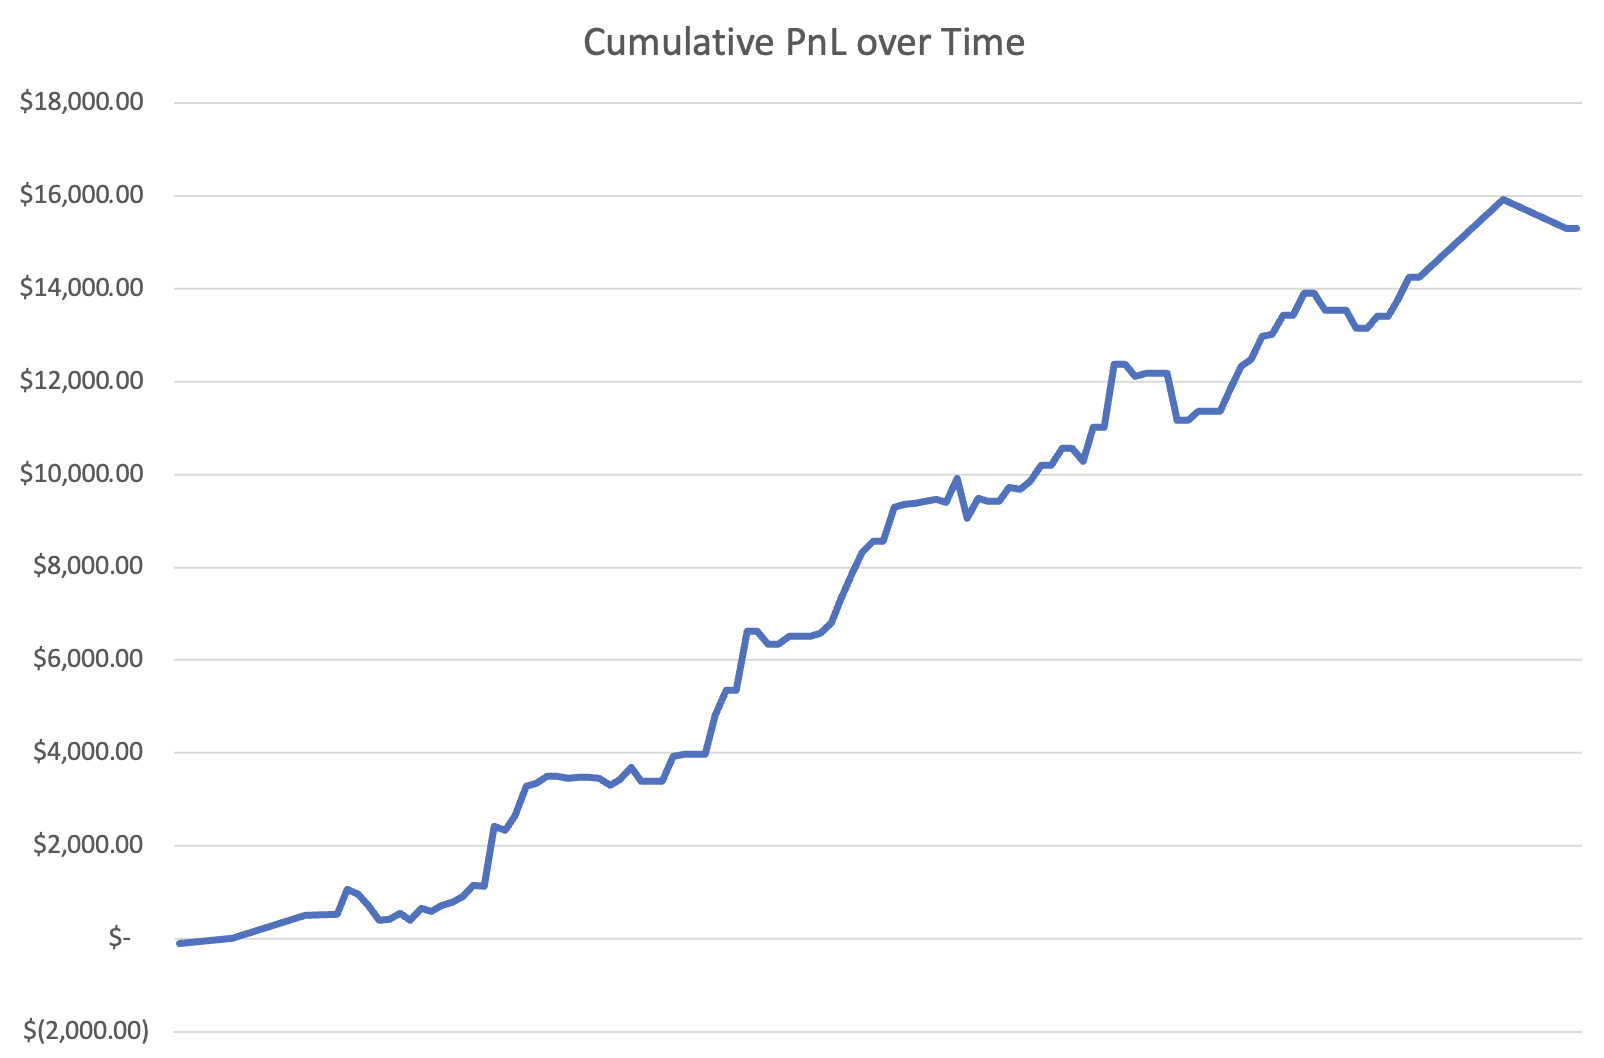

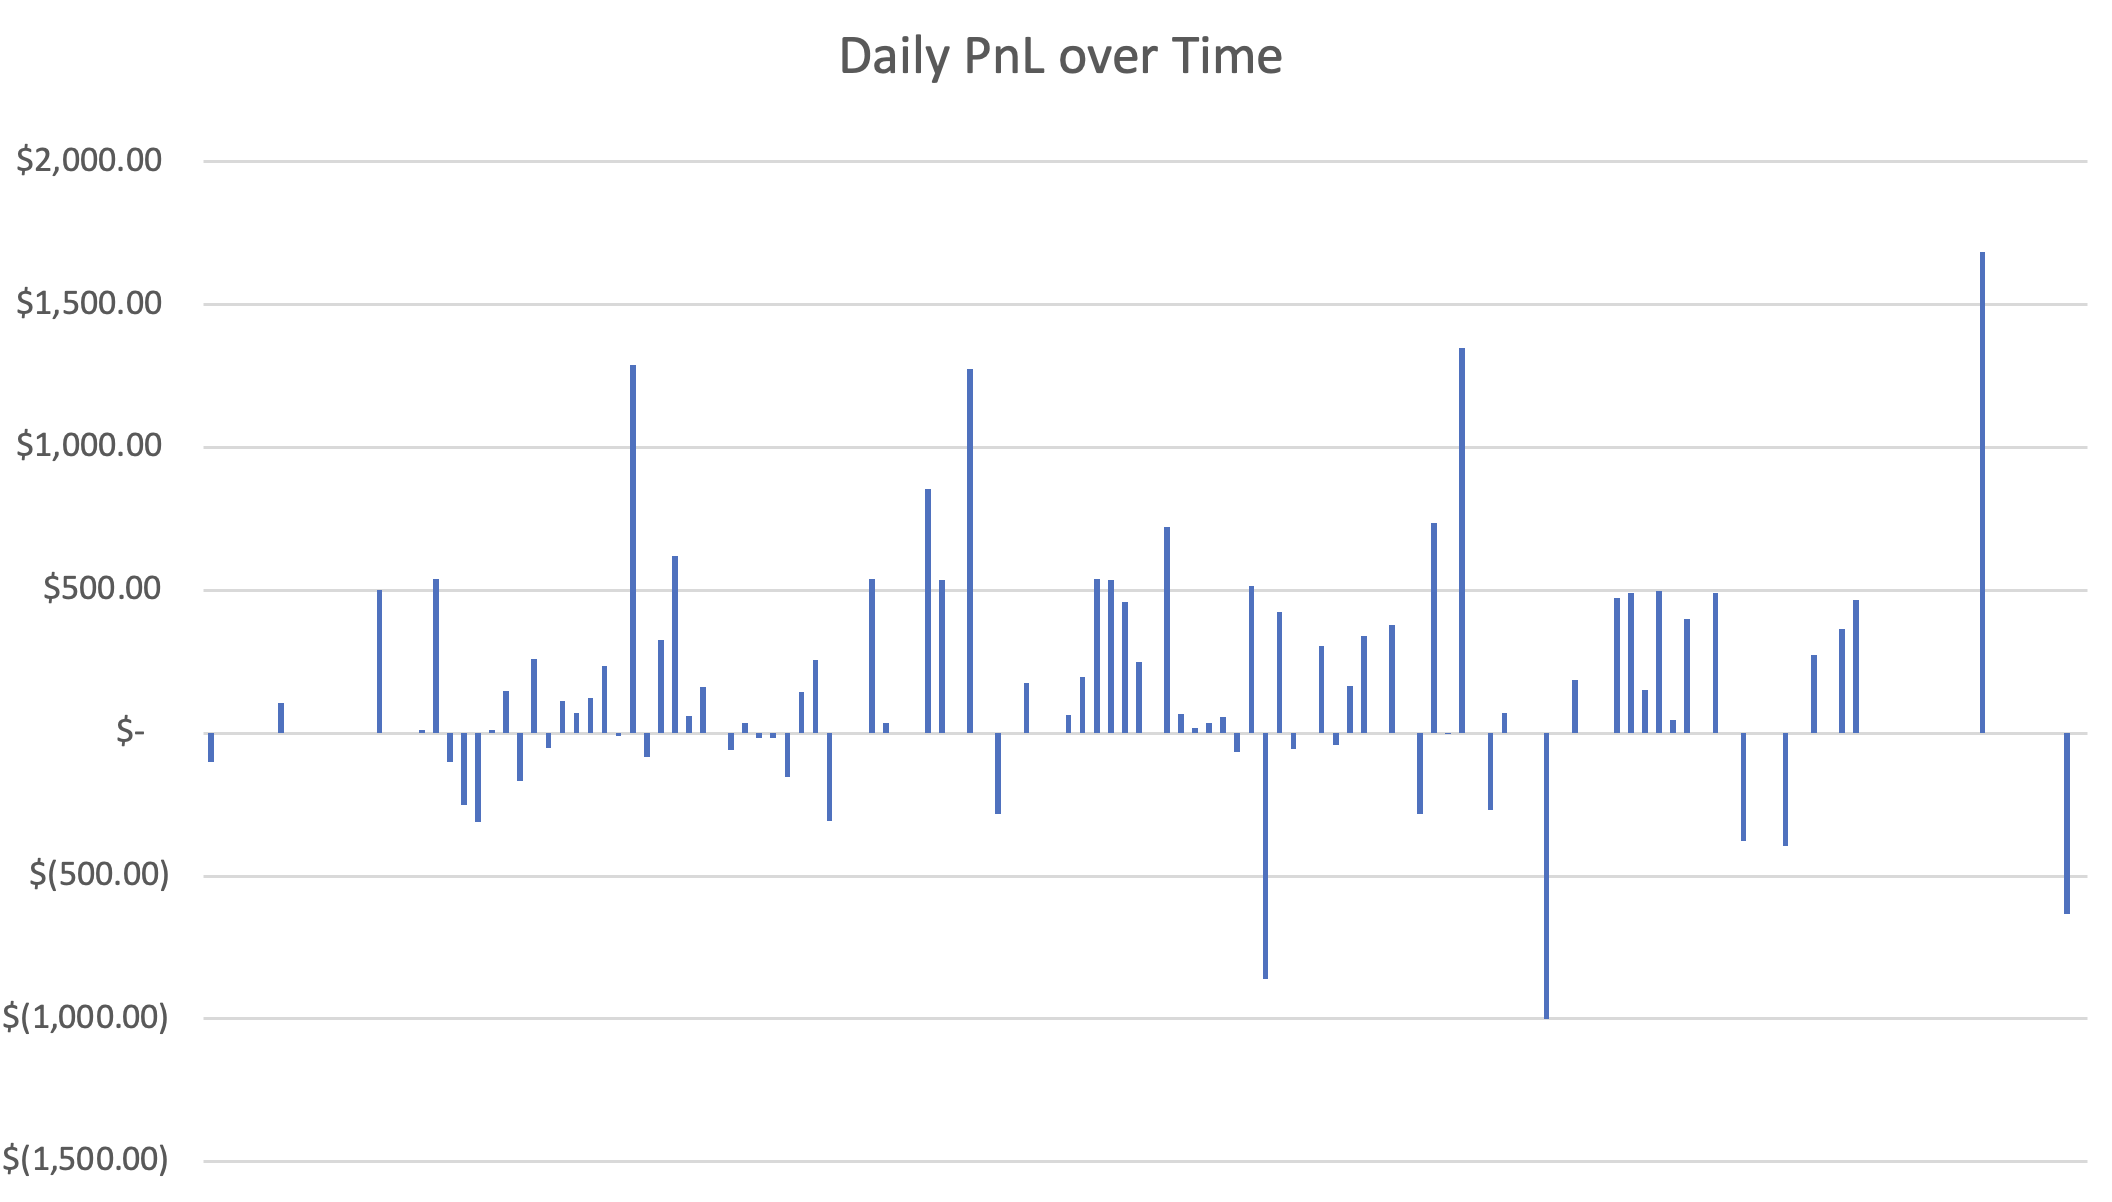

Clearly some big winning days were met with sizeable losing days, but in the long run, there were more winning days which heavily overturned all the losses and produced a sizeable income stream for myself over this particular summer. This definitely shows that the mathematics was not flawed, having placed well over 1500 bets to date and a solid profit margin since. 

## Limitations and Extensions

Obviously the limitation of bookmakers banning you from promotions is a big deal, and this can be delayed through practices such as mug betting, where you act like a standard punter who does not take sharp bets and betting on non-promotional products from time to time. Another limitation is stake sizing, which you can bypass by using multiple bookmakers on the same event, or "scaling", at the cost of increased variance. 

Some extensions could be made into the investigation of bias towards favourites. That is, since bookmakers tend to under-price their favourite markets because of the sheer amount of gamblers who believe in them, is there merit in avoiding placing bets on heavy favourites due to concerns over poor pricing mechanisms?

# Conclusion
Although a very brief introduction to the sports betting world, this report explained some basic probability concepts and outlined how you can utilise mathematics to capitilise on betting markets and promotions in Australia. Relationships were drawn to the trading world and limitations with these practices were outlined with some possible solutions. Ultimately, everybody who has the time has the ability to profit a significant amount of money from online gambling sites by being aware of how to capitilise on certain promotions and betting strategies. 